In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import json
import pickle 

In [11]:
data = {
    "balance": 0, 
    "lastUpdated": None,
    "month": None, 
    "totalExpenses": 0, 
    "totalIncome": 0,
    "incomeKategori": [],
    "expensesKategori": []
}

In [12]:
table = pd.DataFrame([data])

In [13]:
table.head()

,balance,lastUpdated,month,totalExpenses,totalIncome,incomeKategori,expensesKategori
0,0,None,None,0,0,[],[]


In [14]:
#bikin json file nya dulu ygy
with open('recarticle.json', 'r') as file:
    data_article = json.load(file)

In [15]:
#test json yang sudah dibuad
articles = data_article["articles"]
for article in articles:
    print(f"Title: {article['title']}, Link: {article['link']}")

Title: 10 Tips to Save Money, Link: https://www.regions.com/insights/personal/personal-finances/budgeting-and-saving/10-best-ways-to-save-money
Title: How to Manage Entertainment Expenses, Link: https://www.hellobrigit.com/learn/how-to-save-money-on-entertainment
Title: Beginner's Guide to Financial Planning, Link: https://www.nerdwallet.com/article/investing/what-is-a-financial-plan
Title: How to stop overspending your income, Link: https://money.usnews.com/money/personal-finance/spending/articles/inside-the-psychology-of-overspending-and-how-to-stop


In [16]:
# Check if the JSON has the "articles" key
if "articles" not in data_article:
    print("Error: 'articles' key is missing in the JSON file.")
else:
    print("JSON loaded successfully!")
    print("Articles data:", data_article["articles"])  # Check the contents of 'articles'


JSON loaded successfully!
Articles data: [{'id': 1, 'title': '10 Tips to Save Money', 'tags': 'saving, budgeting, tips', 'link': 'https://www.regions.com/insights/personal/personal-finances/budgeting-and-saving/10-best-ways-to-save-money'}, {'id': 2, 'title': 'How to Manage Entertainment Expenses', 'tags': 'budgeting, entertainment', 'link': 'https://www.hellobrigit.com/learn/how-to-save-money-on-entertainment'}, {'id': 3, 'title': "Beginner's Guide to Financial Planning", 'tags': 'planning, savings, finance', 'link': 'https://www.nerdwallet.com/article/investing/what-is-a-financial-plan'}, {'id': 3, 'title': 'How to stop overspending your income', 'tags': 'overspending, income, general', 'link': 'https://money.usnews.com/money/personal-finance/spending/articles/inside-the-psychology-of-overspending-and-how-to-stop'}]


Masukkan nickname Anda:  ss
Masukkan total pemasukan awal: Rp.  2


Pemasukan awal sebesar Rp.2 telah dicatat.



Pilih mode saving (30%, 50%, 80%, atau berapa persen kamu ingin menabung?):  30%


Input tidak valid (could not convert string to float: '30%'). Menggunakan mode saving default (30%).
Mode saving sebesar 30% (Rp.1) telah diterapkan.


=== Tambahkan Transaksi ===


Masukkan tipe transaksi (pemasukan/pengeluaran/selesai):  selesai



=== Ringkasan Keuangan ===
  Total Pemasukan  : Rp.2
  Total Pengeluaran: Rp.0
  Balance          : Rp.1
  Total Tabungan   : Rp.1

Detail Pemasukan:

Detail Pengeluaran:

Hi, ss!

Here's your financial summary for this month:
Your income was Rp.2 and your expenses were Rp.0.
Good job! No categories exceeded your savings percentage.
Great job! You've met your savings target 🎉.
No anomalies detected. Keep up the good work!
Allocate more to savings to meet your target next month.

Stay motivated, ss 💪!



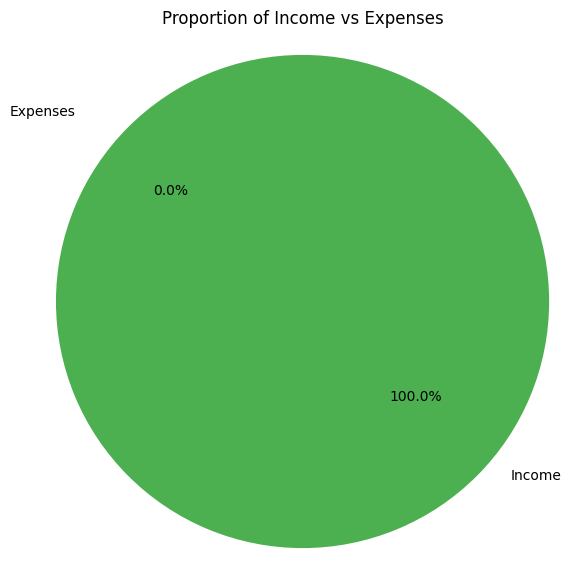

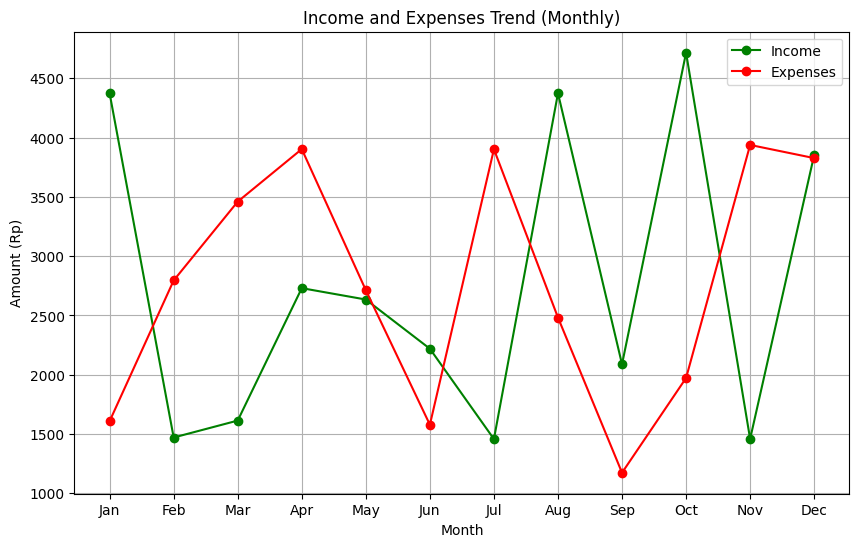


Apakah Anda ingin melanjutkan transaksi? (ya/tidak):  tidak


Terima kasih telah menggunakan aplikasi keuangan. Sampai jumpa!
Selamat datang di aplikasi keuangan.


Masukkan total pemasukan awal: Rp.  2


Pemasukan awal sebesar Rp.2 telah dicatat.



Pilih mode saving (30%, 50%, 80%, atau berapa persen kamu ingin menabung?):  30%


Input tidak valid (could not convert string to float: '30%'). Menggunakan mode saving default (30%).
Mode saving sebesar 30% (Rp.1) telah diterapkan.


=== Tambahkan Transaksi ===


Masukkan tipe transaksi (pemasukan/pengeluaran/selesai):  selesai



=== Ringkasan Keuangan ===
  Total Pemasukan  : Rp.2
  Total Pengeluaran: Rp.0
  Balance          : Rp.1
  Total Tabungan   : Rp.1

Detail Pemasukan:

Detail Pengeluaran:

Hi, ss!

Here's your financial summary for this month:
Your income was Rp.2 and your expenses were Rp.0.
Good job! No categories exceeded your savings percentage.
Great job! You've met your savings target 🎉.
No anomalies detected. Keep up the good work!
Allocate more to savings to meet your target next month.

Stay motivated, ss 💪!




Apakah Anda ingin melanjutkan transaksi? (ya/tidak):  tidak


Terima kasih telah menggunakan aplikasi keuangan. Sampai jumpa!


In [20]:
# Struktur data untuk menyimpan informasi keuangan
data = {
    "balance": 0,
    "totalExpenses": 0,
    "totalIncome": 0,
    "incomeCategories": [],
    "expenseCategories": [],
    "savings": 0,
}

#open json file nya dulu ygy
with open('recarticle.json', 'r') as file:
    data_article = json.load(file)

def plot_pie_chart():
    """Plot a pie chart of income and expenses."""
    labels = ['Income', 'Expenses']
    sizes = [data['totalIncome'], data['totalExpenses']]
    colors = ['#4CAF50', '#FF5733']
    plt.figure(figsize=(7, 7))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0.1, 0))
    plt.title("Proportion of Income vs Expenses")
    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
    plt.show()

def plot_line_chart():
    """Plot a line chart for income and expenses trend."""
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    income_trend = np.random.randint(1000, 5000, 12)  # Dummy data, replace with your actual data
    expense_trend = np.random.randint(500, 4000, 12)  # Dummy data, replace with your actual data

    plt.figure(figsize=(10, 6))
    plt.plot(months, income_trend, label='Income', color='green', marker='o')
    plt.plot(months, expense_trend, label='Expenses', color='red', marker='o')
    plt.title("Income and Expenses Trend (Monthly)")
    plt.xlabel("Month")
    plt.ylabel("Amount (Rp)")
    plt.legend()
    plt.grid(True)
    plt.show()

#article recommendation func
def recommend_articles(anomaly, articles):
    """Recommend articles based on anomaly and tags."""
    recommendations = []
    anomaly_keywords = anomaly.lower().split()
    for article in articles:
        tags = article["tags"].lower().split(", ")
        if any(keyword in tags for keyword in anomaly_keywords):
            recommendations.append({
                "title": article["title"],
                "link": article["link"]
            })
    return recommendations

def inputInitialIncome():
    """Fungsi untuk input pemasukan awal saat memulai aplikasi."""
    totalIncome = int(input("Masukkan total pemasukan awal: Rp. "))
    data["totalIncome"] = totalIncome
    data["balance"] = totalIncome
    print(f"Pemasukan awal sebesar Rp.{totalIncome:,.0f} telah dicatat.\n")
    inputSavingMode()

def inputSavingMode():
    """Fungsi untuk memilih mode saving atau memasukkan persentase custom."""
    saving_input = input("Pilih mode saving (30%, 50%, 80%, atau berapa persen kamu ingin menabung?): ").strip()

    try:
        # input custom terserah user
        saving_percentage = float(saving_input)
        if saving_percentage <= 0 or saving_percentage > 100:
            raise ValueError("Persentase harus antara 1 sampai 100.")
    except ValueError as e:
        print(f"Input tidak valid ({e}). Menggunakan mode saving default (30%).")
        saving_percentage = 30 #default ke 30%

    save_amount = data["totalIncome"] * (saving_percentage / 100)
    data["savings"] = save_amount
    data["balance"] -= save_amount
    print(f"Mode saving sebesar {saving_percentage:.0f}% (Rp.{save_amount:,.0f}) telah diterapkan.\n")

def addTransaction():
    """Fungsi untuk menambahkan pemasukan atau pengeluaran."""
    while True:
        print("\n=== Tambahkan Transaksi ===")
        trans_type = input("Masukkan tipe transaksi (pemasukan/pengeluaran/selesai): ").lower()
        
        if trans_type == "selesai":
            break
        elif trans_type not in ["pemasukan", "pengeluaran"]:
            print("Tipe transaksi tidak valid. Silakan coba lagi.")
            continue

        amount = int(input("Masukkan jumlah transaksi (Rp): "))
        category_name = input("Masukkan kategori transaksi: ").strip()

        if trans_type == "pemasukan":
            data["incomeCategories"].append({"category": category_name, "amount": amount})
            data["totalIncome"] += amount
            data["balance"] += amount
            print(f"Pemasukan sebesar Rp.{amount:,.0f} dengan kategori '{category_name}' telah ditambahkan.")
        elif trans_type == "pengeluaran":
            data["expenseCategories"].append({"category": category_name, "amount": amount})
            data["totalExpenses"] += amount
            data["balance"] -= amount
            print(f"Pengeluaran sebesar Rp.{amount:,.0f} dengan kategori '{category_name}' telah ditambahkan.")

def detectAnomaly():
    """Detect anomalies when expenses exceed income and recommend articles."""
    if data["totalExpenses"] > data["totalIncome"]:
        print("\n=== Anomali Terdeteksi ===")
        print("Pengeluaran Anda lebih besar dari pemasukan!")
        print(f"  Total Pengeluaran: Rp.{data['totalExpenses']:,.0f}")
        print(f"  Total Pemasukan  : Rp.{data['totalIncome']:,.0f}")
        print("Segera lakukan evaluasi pengeluaran Anda.\n")
        
        # Trigger article recommendation
        anomaly = "Overspending on income"
        recommended_articles = recommend_articles(anomaly, data_article["articles"])

        if recommended_articles:
            print("Rekomendasi Artikel:")
            for article in recommended_articles:
                print(f"  - {article['title']}: {article['link']}")
        else:
            print("Tidak ada artikel relevan. Nantikan update berikutnya.")

def detectAnomalyWithModel():
    """Detect unusual expenses using Isolation Forest and recommend articles."""
    if len(data["expenseCategories"]) < 2:
        return  # Data terlalu sedikit untuk analisis

    amounts = np.array([item["amount"] for item in data["expenseCategories"]]).reshape(-1, 1)
    model = IsolationForest(random_state=42, contamination=0.2)
    model.fit(amounts)

    # Simpan model ke file .pkl
    with open("isolation_forest_model.pkl", "wb+") as file:
        pickle.dump(model, file)

    labels = model.predict(amounts)
    print("\n=== Deteksi Anomali ===")
    anomaly_detected = False
    for i, label in enumerate(labels):
        if label == -1:
            category = data["expenseCategories"][i]["category"]
            amount = data["expenseCategories"][i]["amount"]
            print(f"  - {category} sebesar Rp.{amount:,.0f} terdeteksi sebagai anomali.")
            
            # Trigger article recommendation
            anomaly = f"Unusual spending on {category}"
            recommended_articles = recommend_articles(anomaly, data_article["articles"])

            if recommended_articles:
                print("Rekomendasi Artikel:")
                for article in recommended_articles:
                    print(f"  - {article['title']}: {article['link']}")
                anomaly_detected = True

    if not anomaly_detected:
        print("Tidak ada anomali yang terdeteksi.")

def showSummary():
    """Fungsi untuk menampilkan ringkasan data keuangan."""
    print("\n=== Ringkasan Keuangan ===")
    print(f"  Total Pemasukan  : Rp.{data['totalIncome']:,.0f}")
    print(f"  Total Pengeluaran: Rp.{data['totalExpenses']:,.0f}")
    print(f"  Balance          : Rp.{data['balance']:,.0f}")
    print(f"  Total Tabungan   : Rp.{data['savings']:,.0f}")

    print("\nDetail Pemasukan:")
    for item in data["incomeCategories"]:
        print(f"  - {item['category']}: Rp.{item['amount']:,.0f}")
    print("\nDetail Pengeluaran:")
    for item in data["expenseCategories"]:
        print(f"  - {item['category']}: Rp.{item['amount']:,.0f}")

def generateFinancialReport(nickname):
    """Generate and display a personalized financial report."""
    print(f"\nHi, {nickname}!\n")
    print("Here's your financial summary for this month:")
    print(f"Your income was Rp.{data['totalIncome']:,.0f} and your expenses were Rp.{data['totalExpenses']:,.0f}.")

    # Temukan pengeluaran terbesar
    if data["expenseCategories"]:
        highest_expense = max(data["expenseCategories"], key=lambda x: x["amount"])
        print(f"Your highest spending was in the {highest_expense['category']} category.")

    # Temukan kategori pengeluaran yang melebihi persentase tabungan
    exceeded_categories = [
        item["category"] for item in data["expenseCategories"]
        if item["amount"] > data["savings"]
    ]
    if exceeded_categories:
        print(f"Expenses in categories {', '.join(exceeded_categories)} exceeded the percentage you set.")
    else:
        print("Good job! No categories exceeded your savings percentage.")

    # Evaluasi progress tabungan
    savings_target = data["totalIncome"] * (data["savings"] / data["totalIncome"])
    if data["savings"] < savings_target:
        progress = (data["savings"] / savings_target) * 100
        print(f"Your savings progress only reached {progress:.0f}% of the target 😣.")
    else:
        print("Great job! You've met your savings target 🎉.")

    # Deteksi anomali
    anomalies = [
        item for item in data["expenseCategories"]
        if item["amount"] > data["totalIncome"] * 0.2  # Contoh ambang batas 20%
    ]
    if anomalies:
        anomaly_categories = [anomaly["category"] for anomaly in anomalies]
        print(f"There was an anomaly in the {', '.join(anomaly_categories)} category compared to previous months.")
        print("What you can do:")
        print(f"Reduce spending in the {', '.join(anomaly_categories)} categories.")
    else:
        print("No anomalies detected. Keep up the good work!")

    # Saran
    print("Allocate more to savings to meet your target next month.")
    print(f"\nStay motivated, {nickname} 💪!\n")

# Panggil fungsi di mainLoop
nickname = input("Masukkan nickname Anda: ").strip()
inputInitialIncome()
while True:
    addTransaction()
    detectAnomaly()
    detectAnomalyWithModel()
    showSummary()
    generateFinancialReport(nickname)
    plot_pie_chart()  # Pie chart of income vs expenses
    plot_line_chart()  # Line chart for income and expense trend
    repeat = input("\nApakah Anda ingin melanjutkan transaksi? (ya/tidak): ").lower()
    if repeat != "ya":
        print("Terima kasih telah menggunakan aplikasi keuangan. Sampai jumpa!")
        break

def mainLoop():
    """Fungsi utama untuk menjalankan program secara otomatis."""
    inputInitialIncome()
    while True:
        addTransaction()
        detectAnomaly()
        detectAnomalyWithModel()
        showSummary()
        generateFinancialReport(nickname)
        repeat = input("\nApakah Anda ingin melanjutkan transaksi? (ya/tidak): ").lower()
        if repeat != "ya":
            print("Terima kasih telah menggunakan aplikasi keuangan. Sampai jumpa!")
            break

# Eksekusi program
print("Selamat datang di aplikasi keuangan.")
mainLoop()

In [22]:
import pickle

with open('Ez_money.pkl', 'wb') as file:
    pickle.dump(model, file)

NameError: name 'model' is not defined